In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_8bit = cv2.imread("/home/angelika/Desktop/8_term/R_D/C++/thermal_image_6.jpg", cv2.IMREAD_GRAYSCALE)

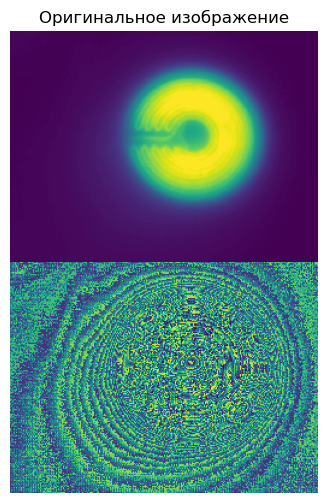

(384, 256)


In [4]:
plt.figure(figsize=(8, 6))
plt.imshow(image_8bit)
plt.title('Оригинальное изображение')
plt.axis('off')
plt.show()
print(np.shape(image_8bit))

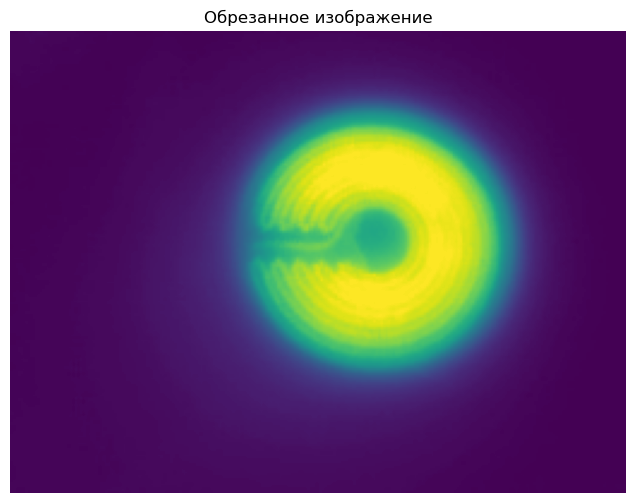

(192, 256)


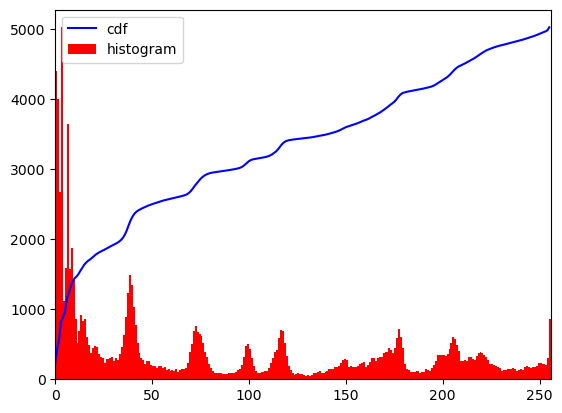

In [5]:
cropped_image = image_8bit[0:192, :]
plt.figure(figsize=(8, 6))
plt.imshow(cropped_image)
plt.title('Обрезанное изображение')
plt.axis('off')
plt.show()
print(np.shape(cropped_image))

hist,bins = np.histogram(image_8bit.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_8bit.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

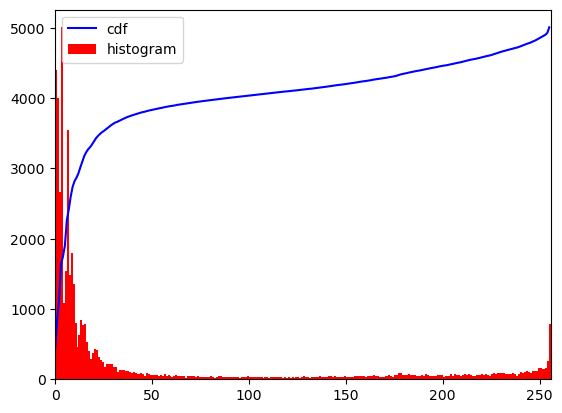

In [6]:
image_16bit = cropped_image.astype(np.int16)

hist,bins = np.histogram(image_16bit.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_16bit.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#почему график плотности вероятности сглаживается?

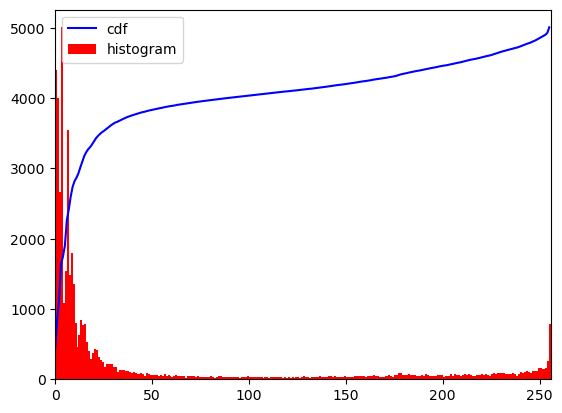

In [7]:
norm_image = cv2.normalize(image_16bit, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
# CV_8UC1 - ?
hist,bins = np.histogram(norm_image.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(norm_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## нормализация 

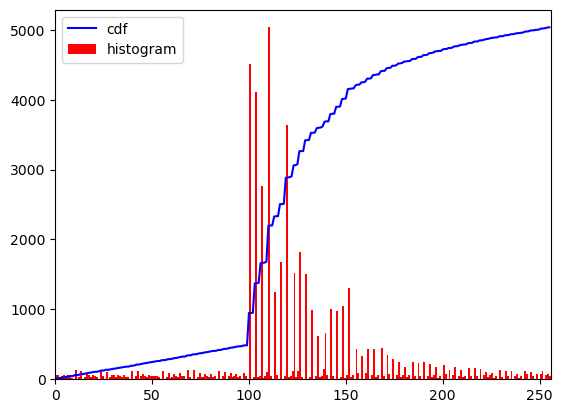

In [11]:
image_norm = ((cropped_image - cropped_image.mean()) / cropped_image.std() * 255).astype(np.uint8)
hist,bins = np.histogram(image_norm.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_norm.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

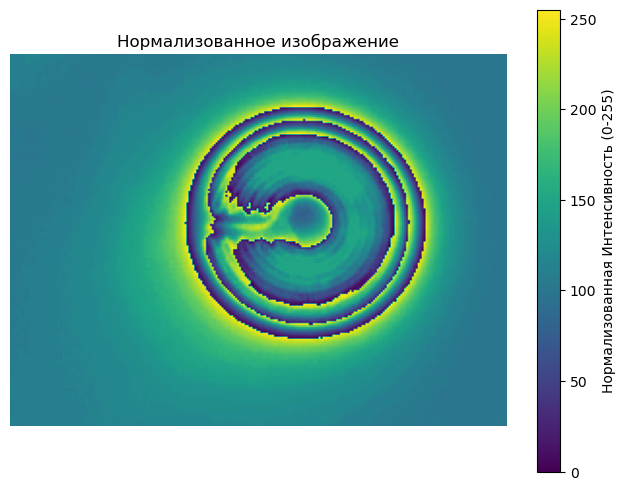

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(image_norm)
plt.colorbar(label='Нормализованная Интенсивность (0-255)')
plt.title('Нормализованное изображение')
plt.axis('off')
plt.show()

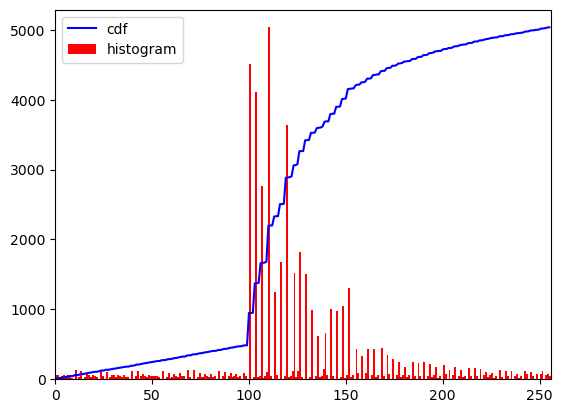

In [25]:
image_norm = ((image_16bit - image_16bit.mean()) / image_16bit.std() * 255).astype(np.uint8)
hist,bins = np.histogram(image_norm.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_norm.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

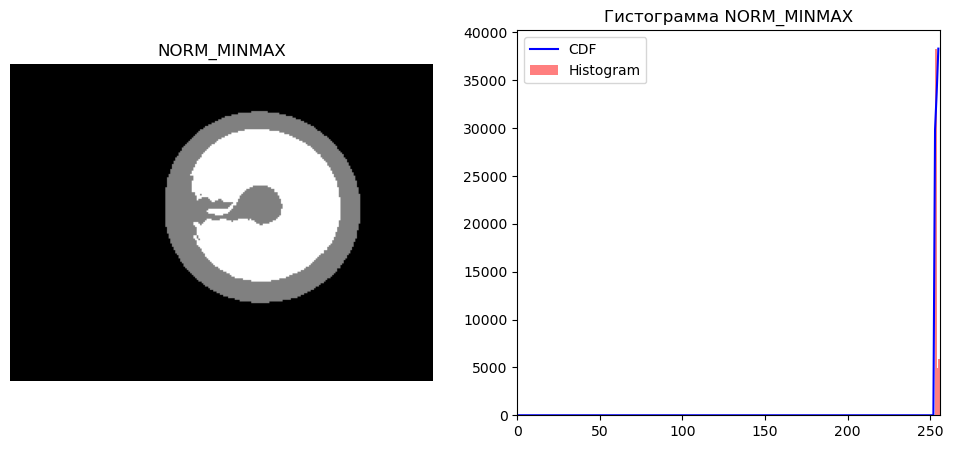

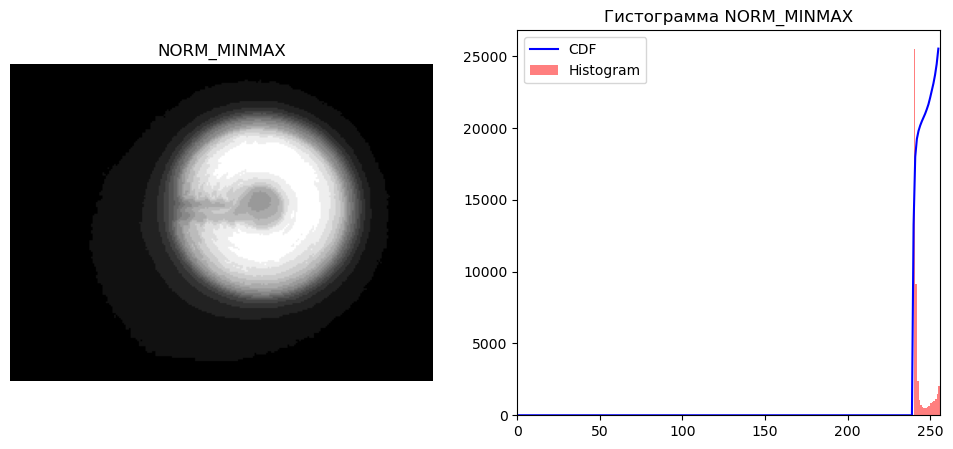

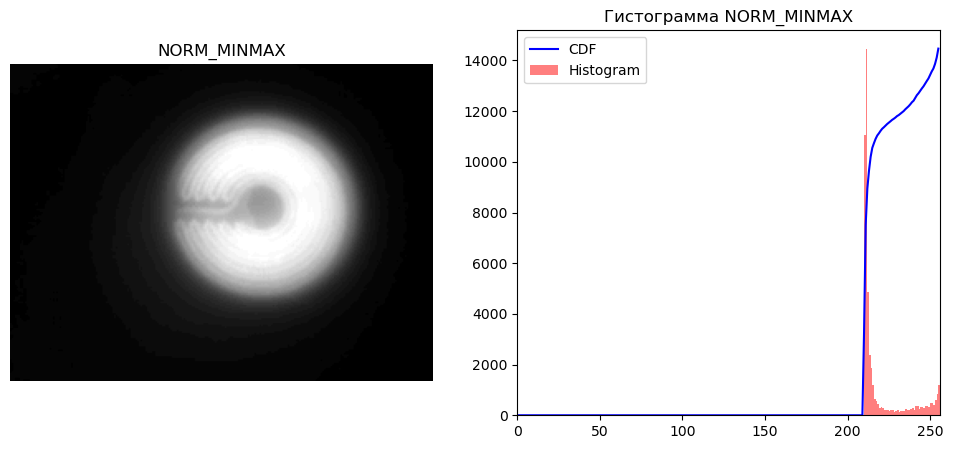

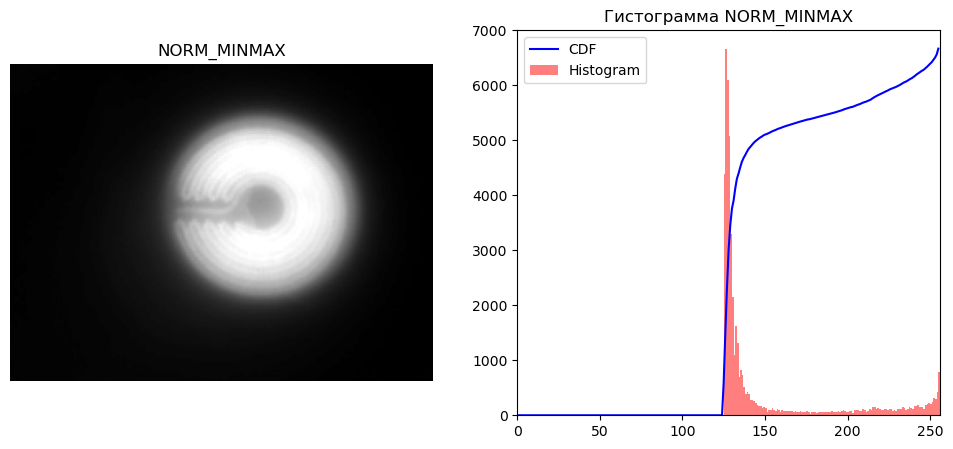

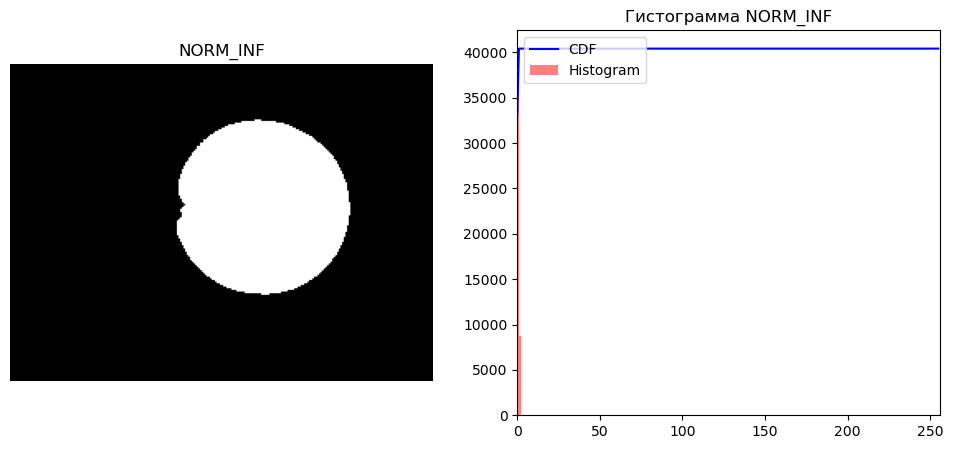

In [36]:
norm_253 = cv2.normalize(image_16bit, None, 253, 255, cv2.NORM_MINMAX).astype(np.uint8)
norm_240 = cv2.normalize(image_16bit, None, 240, 255, cv2.NORM_MINMAX).astype(np.uint8)
norm_210 = cv2.normalize(image_16bit, None, 210, 255, cv2.NORM_MINMAX).astype(np.uint8)
norm_125 = cv2.normalize(image_16bit, None, 125, 255, cv2.NORM_MINMAX).astype(np.uint8)
#norm_l1 = cv2.normalize(image_16bit, None, 1, 0, cv2.NORM_L1)
#norm_l2 = cv2.normalize(image_16bit, None, 1, 0, cv2.NORM_L2)
norm_inf = cv2.normalize(image_16bit, None, 1, 0, cv2.NORM_INF)


def plot_image_and_histogram(image, title):
    plt.figure(figsize=(12, 5))

    # Отображаем изображение
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis("off")

    # Строим гистограмму распределения
    plt.subplot(1, 2, 2)
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()

    plt.plot(cdf_normalized, color='b')
    plt.hist(image.flatten(), 256, [0, 256], color='r', alpha=0.5)
    plt.xlim([0, 256])
    plt.legend(('CDF', 'Histogram'), loc='upper left')
    plt.title(f'Гистограмма {title}')

    plt.show()

plot_image_and_histogram(norm_253, "NORM_MINMAX")
plot_image_and_histogram(norm_240, "NORM_MINMAX")
plot_image_and_histogram(norm_210, "NORM_MINMAX")
plot_image_and_histogram(norm_125, "NORM_MINMAX")
plot_image_and_histogram(norm_inf, "NORM_INF")

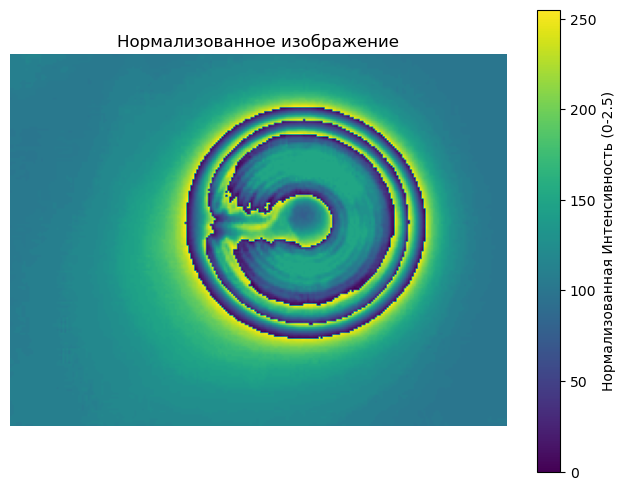

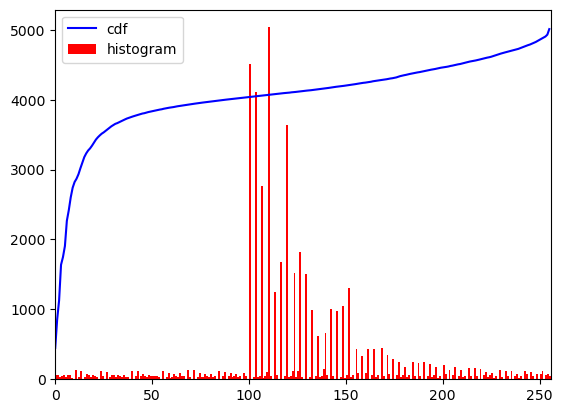

In [27]:
plt.figure(figsize=(8, 6))
plt.imshow(image_norm)
plt.colorbar(label='Нормализованная Интенсивность (0-2.5)')
plt.title('Нормализованное изображение')
plt.axis('off')
plt.show()

hist,bins = np.histogram(image_16bit.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_norm.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

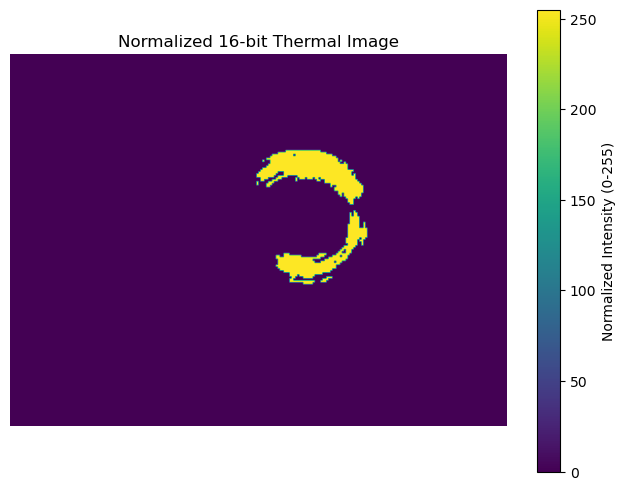

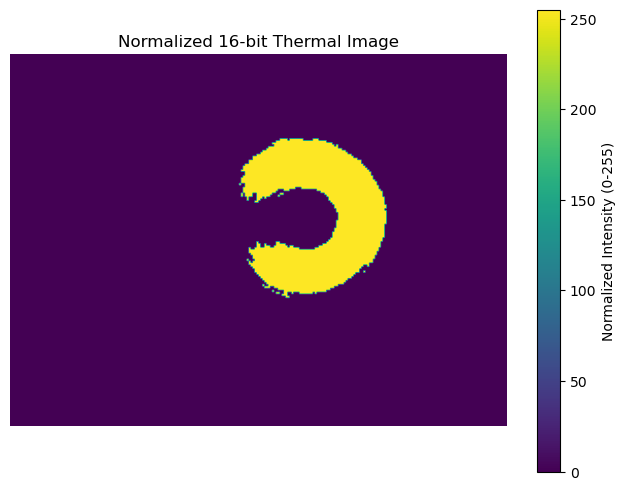

In [44]:
_, mask = cv2.threshold(norm_210, 250, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 6))
plt.imshow(mask)
plt.colorbar(label='Normalized Intensity (0-255)')
plt.title('Normalized 16-bit Thermal Image')
plt.axis('off')
plt.show()

Original Image Shape: (853, 1280, 3)


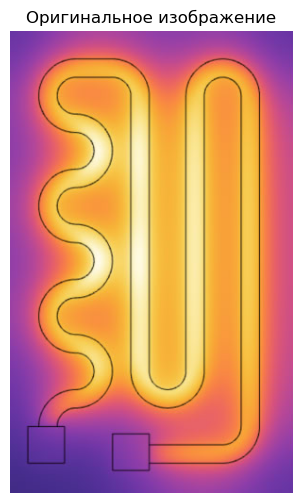

Cropped Image Shape: (490, 300, 3)


True

In [45]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_8bit = cv2.imread("/home/angelika/Desktop/8_term/R_D/python_utils/multipysics.jpg")

# Ensure the image is read correctly
if image_8bit is None:
    raise ValueError("Error: The image could not be loaded. Check the file path.")

image = cv2.cvtColor(image_8bit, cv2.COLOR_BGR2RGB)  # Corrected

print("Original Image Shape:", image_8bit.shape)

# Crop the image
cropped_image = image[290:780, 480:780]

# Display the cropped image
plt.figure(figsize=(8, 6))
plt.imshow(cropped_image)  # Convert for correct color representation
plt.title('Оригинальное изображение')
plt.axis('off')
plt.show()

print("Cropped Image Shape:", np.shape(cropped_image))

cv2.imwrite("/home/angelika/Desktop/8_term/R_D/python_utils/multipysics_crop.jpg", cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))